# ------------ 1. 파이토치 기초 -------------

## 01. 파이토치 패키지의 기본 구성
### 1. torch
메인 네임스페이스. 텐서 등의 다양한 수학 함수가 포함되어져 있으며 Numpy와 유사한 구조를 가집니다.
### 2. torch.autograd
자동 미분을 위한 함수들이 포함되어져 있습니다. 자동 미분의 on/off를 제어하는 콘텍스트 매니저 enable_grad, no_grad, 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 Function등이 포함되어져 있습니다.
### 3. torch.nn
신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어져 있습니다. 예를 들어 RNN, LSTM과 같은 레이어, ReLU같은 활성화 함수, MSELoss와 같은 손실 함수들이 있습니다.
### 4. torch.optim
확률적 경사 하강법(Stochasitic Gradient Descent, SGD)을 중심으로 한 파라미터 최적화 알고리즘이 구현되어져 있습니다.
### 5. torch.utils.data
### 6. torch.onnx


## 02. 텐서 조작하기 1
#### batch size : 훈련 데이터에 개수가 많을 때, 컴퓨터가 한번에 처리하는 양(배치 크기)

In [10]:
# Numpy를 Tensor로 만들기

import numpy as np

t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)
print(t.ndim) # 1차원
print(t.shape) # (1 X 7)의 크기를 가지는 벡터 (7, 1)

# 2행 3열의 2D 텐서 : (2, 3), (2 X 3)

import torch
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)
print(t.dim())
print(t.shape)
print(t.size())

[0. 1. 2. 3. 4. 5. 6.]
1
(7,)
tensor([0., 1., 2., 3., 4., 5., 6.])
1
torch.Size([7])
torch.Size([7])


In [13]:
# 크기가 다른 tensor간의 연산 : 브로드캐스팅(BroadCasting)
m1 = torch.FloatTensor([[1,2]])
m2 = torch.FloatTensor([3])
print(m1+m2)

# 행렬 곱셈
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print(m1)
print(m2)
print(m1.matmul(m2))

# element-wise 곱셈
print(m1.mul(m2))
print(m1 * m2)


tensor([[4., 5.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1.],
        [2.]])
tensor([[ 5.],
        [11.]])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [24]:
# Tensor의 평균/덧셈/max/argmax
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.mean())
print(t.sum(dim=0)) # dim=0 : 첫번째 차원, 행을 제거한다는 의미, 즉, 열의 차원을 보존하며 평균을 구함 -> (1,2)
print(t.max(dim=1)[0]) #  -> (2,1) 하지만 결국 1차원이므로 (1,2)와 같이 표현됨
print(t.max(dim=-1)[0]) # max : 최대값을 리턴, 마지막 차원 제거
print(t.max(dim=1)[1]) # argmax : 최대값을 가진 인덱스를 리턴

tensor([[1., 2.],
        [3., 4.]])
tensor(2.5000)
tensor([4., 6.])
tensor([2., 4.])
tensor([2., 4.])
tensor([1, 1])



## 03. 텐서 조작하기 2
#### 뷰(view) : 원소의 수를 유치하면서 텐서의 크기 변경. 매우 중요함!! numpy에서의 reshape

In [30]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft)
print(ft.shape)
print(ft.view(-1,3))
print(ft.view(-1,3).shape) # 텐서를 (?,3)의 크기로 변경

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])
torch.Size([2, 2, 3])
tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [33]:
# squeeze : 크기가 1인 차원을 제거합니다.
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

sq = ft.squeeze()

print(sq)
print(sq.shape)

# unsqueeze : 특정 위치에 1인 차원을 추가한다.


tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])


In [36]:
print(sq.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(sq.unsqueeze(0).shape)

print(sq.unsqueeze(1)) # 두번째 차원에 추가
print(sq.unsqueeze(-1)) # 마지막 차원에 1인 차원 추가

tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0.],
        [1.],
        [2.]])
tensor([[0.],
        [1.],
        [2.]])


#### Tensor의 자료형 : Type Casting
`torch.float32` `torch.float` `torch.double` `torch.long` `torch.int64` 등등

In [39]:
# tensor 연결하기
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

print(torch.cat([x,y], dim=0)) # 첫번째 차원을 늘릴것
print(torch.cat([x,y], dim=1)) # 두번째 차원을 늘릴것

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [40]:
# stacking
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))

print(torch.stack([x, y, z], dim=1)) # 두번째 차원이 증가하도록 쌓으라는 의미

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [41]:
# 동일한 크기를 갖는 텐서 만들기
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [43]:
# In-place Operation(덮어쓰기 연산) : 연산 뒤에 _를 붙이면 기존의 값을 덮어쓰기함.
x = torch.FloatTensor([[1,2],[3,4]])
print(x)
print(x.mul_(2.))
print(x)

tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


## 04. 파이썬 : 클래스(class)
#### 빵틀과 빵, 코드를 간결하게



# ------------ 2. 선형 회귀 --------------

## 01. 선형 회귀
#### 데이터에 대한 이해, 가설 수립, 손실 계산하기, 경사 하강법

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[4], [5], [6]])
print(x_train.shape)
print(y_train.shape)

torch.Size([3, 1])
torch.Size([3, 1])


$ y = Wx + b $ <br><br>
가장 잘 맞는 직선을 정의하는 W와 b의 값을 찾는 것.

In [5]:
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)
print(W)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [6]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [7]:
cost = torch.mean((hypothesis-y_train)**2)
print(cost)

tensor(25.6667, grad_fn=<MeanBackward0>)


In [9]:
optimizer = optim.SGD([W, b], lr=0.01) # 학습 대상 : W, b, 학습률 = 0.01
optimizer.zero_grad() # gradient를 0으로 초기화, 파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있습니다. 따라서 기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있습니다.

cost.backward() #비용함수를 미분하여 gradient 계산

optimizer.step() # 리턴되는 변수들의 gradient에 학습률 0.01을 곱하여 빼주면서 업데이트

In [10]:
nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/2000 W: 0.403, b: 0.189 Cost: 20.423275
Epoch  100/2000 W: 1.738, b: 1.322 Cost: 0.405913
Epoch  200/2000 W: 1.580, b: 1.681 Cost: 0.250829
Epoch  300/2000 W: 1.456, b: 1.963 Cost: 0.154997
Epoch  400/2000 W: 1.359, b: 2.185 Cost: 0.095779
Epoch  500/2000 W: 1.282, b: 2.359 Cost: 0.059185
Epoch  600/2000 W: 1.222, b: 2.496 Cost: 0.036573
Epoch  700/2000 W: 1.174, b: 2.604 Cost: 0.022600
Epoch  800/2000 W: 1.137, b: 2.689 Cost: 0.013965
Epoch  900/2000 W: 1.108, b: 2.755 Cost: 0.008630
Epoch 1000/2000 W: 1.085, b: 2.808 Cost: 0.005333
Epoch 1100/2000 W: 1.067, b: 2.849 Cost: 0.003295
Epoch 1200/2000 W: 1.052, b: 2.881 Cost: 0.002036
Epoch 1300/2000 W: 1.041, b: 2.907 Cost: 0.001258
Epoch 1400/2000 W: 1.032, b: 2.927 Cost: 0.000778
Epoch 1500/2000 W: 1.025, b: 2.942 Cost: 0.000480
Epoch 1600/2000 W: 1.020, b: 2.955 Cost: 0.000297
Epoch 1700/2000 W: 1.016, b: 2.964 Cost: 0.000183
Epoch 1800/2000 W: 1.012, b: 2.972 Cost: 0.000113
Epoch 1900/2000 W: 1.010, b: 2.978 Cost: 0.000070

## 02. 자동 미분(Autograd)
#### 경사 하강법은 비용 함수를 미분하여 이 함수의 기울기(gradient)를 구해서 비용이 최소화 되는 방향을 찾아내는 알고리즘, 파이토치는 자동 미분(Autograd)을 지원

## 03. 다중 선형 회귀
#### 다수의 x로부터 y를 예측

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

### 안좋은 코드, 각 매개변수만큼 tensor 선언

In [18]:
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [14]:
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [17]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497607
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319511
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215696
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167818
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079378


### 더 나은 코드, 행렬곱 사용

In [21]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
            epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
        ))


Epoch    0/1000 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch  100/1000 hypothesis: tensor([152.7691, 183.6985, 180.9591, 197.0627, 140.1336]) Cost: 1.563634
Epoch  200/1000 hypothesis: tensor([152.7273, 183.7273, 180.9465, 197.0517, 140.1731]) Cost: 1.497607
Epoch  300/1000 hypothesis: tensor([152.6866, 183.7554, 180.9343, 197.0409, 140.2116]) Cost: 1.435026
Epoch  400/1000 hypothesis: tensor([152.6470, 183.7827, 180.9224, 197.0304, 140.2491]) Cost: 1.375730
Epoch  500/1000 hypothesis: tensor([152.6085, 183.8093, 180.9108, 197.0201, 140.2856]) Cost: 1.319511
Epoch  600/1000 hypothesis: tensor([152.5711, 183.8352, 180.8996, 197.0101, 140.3211]) Cost: 1.266222
Epoch  700/1000 hypothesis: tensor([152.5346, 183.8604, 180.8887, 197.0003, 140.3558]) Cost: 1.215696
Epoch  800/1000 hypothesis: tensor([152.4992, 183.8849, 180.8781, 196.9908, 140.3895]) Cost: 1.167818
Epoch  900/1000 hypothesis: tensor([152.4647, 183.9087, 180.8677, 196.9814, 140.4223]) Cost: 1.122429
Epoch 

## 04. `nn.Module` 로 구현하는 선형 회귀
#### 지금 까지는 직접적인 이해를 위해 가설, 비용 함수를 직접 정의해서 구현했음
#### nn.Module을 이용해 이미 구현되어져 제공되고 있는 함수들을 불러오는 것으로 더 쉽게 구현
#### 선형 회귀 모델 
```
import torch.nn as nn
model = nn.Linear(input_dim, output_dim)
```
#### 평균 제곱오차
```
import torch.nn.functional as F
cost = F.mse_loss(prediction, y_train)
```
H(x) 식에 입력 x로부터 예측된 y를 얻는 것을 forward 연산이라고 합니다.<br>
학습 전, prediction = model(x_train)은 x_train으로부터 예측값을 리턴하므로 forward 연산입니다.<br>
학습 후, pred_y = model(new_var)는 임의의 값 new_var로부터 예측값을 리턴하므로 forward 연산입니다.<br>
학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산이라고 합니다.<br>
cost.backward()는 비용 함수로부터 기울기를 구하라는 의미이며 backward 연산입니다.

In [23]:
# 단순 선형 회귀, 훨씬 낮은 cost

import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

model = nn.Linear(1,1) # input_dim : 1, output_dim : 1
print(list(model.parameters()))

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

[Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]
Epoch    0/2000 Cost: 18.562185
Epoch  100/2000 Cost: 0.128051
Epoch  200/2000 Cost: 0.079128
Epoch  300/2000 Cost: 0.048896
Epoch  400/2000 Cost: 0.030215
Epoch  500/2000 Cost: 0.018671
Epoch  600/2000 Cost: 0.011538
Epoch  700/2000 Cost: 0.007129
Epoch  800/2000 Cost: 0.004406
Epoch  900/2000 Cost: 0.002722
Epoch 1000/2000 Cost: 0.001682
Epoch 1100/2000 Cost: 0.001040
Epoch 1200/2000 Cost: 0.000642
Epoch 1300/2000 Cost: 0.000397
Epoch 1400/2000 Cost: 0.000245
Epoch 1500/2000 Cost: 0.000152
Epoch 1600/2000 Cost: 0.000094
Epoch 1700/2000 Cost: 0.000058
Epoch 1800/2000 Cost: 0.000036
Epoch 1900/2000 Cost: 0.000022
Epoch 2000/2000 Cost: 0.000014


In [25]:
# 학습 후의 W와 b의 값을 출력
print(list(model.parameters()))
# x에 4를 넣어 y 값 확인
new_var = torch.FloatTensor([4.0])
pred_y = model(new_var)
print(pred_y)

[Parameter containing:
tensor([[1.9957]], requires_grad=True), Parameter containing:
tensor([0.0097], requires_grad=True)]
tensor([7.9926], grad_fn=<AddBackward0>)


In [28]:
#다중 선형 회귀 분석
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = nn.Linear(3,1)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 2000
for epoch in range(nb_epochs+1):

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train) 

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31362.457031
Epoch  100/2000 Cost: 0.267423
Epoch  200/2000 Cost: 0.266820
Epoch  300/2000 Cost: 0.266232
Epoch  400/2000 Cost: 0.265654
Epoch  500/2000 Cost: 0.265084
Epoch  600/2000 Cost: 0.264517
Epoch  700/2000 Cost: 0.263968
Epoch  800/2000 Cost: 0.263417
Epoch  900/2000 Cost: 0.262872
Epoch 1000/2000 Cost: 0.262339
Epoch 1100/2000 Cost: 0.261804
Epoch 1200/2000 Cost: 0.261291
Epoch 1300/2000 Cost: 0.260769
Epoch 1400/2000 Cost: 0.260260
Epoch 1500/2000 Cost: 0.259756
Epoch 1600/2000 Cost: 0.259251
Epoch 1700/2000 Cost: 0.258757
Epoch 1800/2000 Cost: 0.258259
Epoch 1900/2000 Cost: 0.257775
Epoch 2000/2000 Cost: 0.257304


In [29]:
new_var =  torch.FloatTensor([[73, 80, 75]]) 
pred_y = model(new_var) 
print(pred_y)
print(list(model.parameters()))

tensor([[151.3034]], grad_fn=<AddmmBackward>)
[Parameter containing:
tensor([[0.9083, 0.4603, 0.6429]], requires_grad=True), Parameter containing:
tensor([-0.0421], requires_grad=True)]


## 05. 클래스로 파이토치 모델 구현하기
#### 파이토치는 대부분의 모델을 클래스를 사용해서 구분합니다.

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [31]:
# 선형 회귀 클래스로 구현하기
# 대부분의 파이토치 구현체에서 사용하고 있는 방식으로 반드시 숙지할 필요가 있습니다.

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# model = nn.Linear(1,1)를 클래스로 구현하면,
# -----------------------------------
class LinearRegressionModel(nn.Module): # nn.Module을 상속받습니다.
    def __init__(self): 
        super().__init__() #nn.Module 클래스의 속성들을 가지고 초기화 됩니다.
        self.linear = nn.Linear(1, 1)

    def forward(self, x): # model 객체를 데이터와 함께 호출하면 자동으로 실행됩니다.
        return self.linear(x)
model = LinearRegressionModel()
# -----------------------------------

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)
    
    optimizer.zero_grad()
    
    cost.backward() 
    
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


## 06. 미니 배치와 데이터 로드
#### 현업에서의 방대한 데이터에서 경사 하강법을 수행하는 것은 매우 느리며 많은 계산을 필요로 합니다. <br> 그렇기 때문에 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념이 나타났습니다.
#### epoch : *전체* 훈련 데이터가 학습에 한 번 사용 된 주기
#### batch size : 배치 크기는 보통 2의 제곱수를 사용
#### iteration : 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 W와 b의 업데이트 횟수
#### 데이터 로드하기 : `Dataset`, `DataLoader` : 미니 배치 학습, 셔플, 병렬 처리까지 간단히 수행합니다.<br> 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것입니다.

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [33]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [34]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

dataset = TensorDataset(x_train, y_train) 
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
# batch_size : 미니 배치의 크기
# shuffle=True : Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿉니다.(권장)

model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    print(batch_idx)
    print(samples)
    x_train, y_train = samples

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

0
[tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]]), tensor([[196.],
        [180.]])]
Epoch    0/20 Batch 1/3 Cost: 50294.707031
1
[tensor([[73., 80., 75.],
        [73., 66., 70.]]), tensor([[152.],
        [142.]])]
Epoch    0/20 Batch 2/3 Cost: 6763.595703
2
[tensor([[93., 88., 93.]]), tensor([[185.]])]
Epoch    0/20 Batch 3/3 Cost: 5374.647949
0
[tensor([[89., 91., 90.],
        [93., 88., 93.]]), tensor([[180.],
        [185.]])]
Epoch    1/20 Batch 1/3 Cost: 1162.977417
1
[tensor([[73., 80., 75.],
        [73., 66., 70.]]), tensor([[152.],
        [142.]])]
Epoch    1/20 Batch 2/3 Cost: 183.729141
2
[tensor([[ 96.,  98., 100.]]), tensor([[196.]])]
Epoch    1/20 Batch 3/3 Cost: 137.012070
0
[tensor([[73., 66., 70.],
        [93., 88., 93.]]), tensor([[142.],
        [185.]])]
Epoch    2/20 Batch 1/3 Cost: 57.777779
1
[tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]]), tensor([[152.],
        [196.]])]
Epoch    2/20 Batch 2/3 Cost: 2.246849
2
[tensor([[89., 91., 90.

## 07. 커스텀 데이터셋
#### `torch.utils.data.Dataset`을 상속받아 직접 커스텀 데이터셋을 만드는 경우
```
class CustomDataset(torch.utils.data.Dataset): 
  def __init__(self):
  데이터셋의 전처리를 해주는 부분

  def __len__(self):
  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx): 
  데이터셋에서 특정 1개의 샘플을 가져오는 함수
```

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Dataset 상속
class CustomDataset(Dataset): 
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# ------------ 4. 로지스틱 회귀 -------------

## 01. 로지스틱 회귀
#### 이진 분류(Binary Classification)의 대표적인 알고리즘
#### 시그모이드 함수 $$ H(x) = sigmoid(Wx+b) = {1 \over 1 + exp(-(Wx+b))} = \sigma(Wx+b) $$
#### 시그모이드 함수의 출력값은 0과 1사이의 값을 가집니다.
#### 실제값이 1일 때 예측값이 0에 가까워지면, 실제값이 0일때 예측값이 1에 가까워지면 오차가 커져야 합니다. -> 로그 함수 사용
#### 실제값이 1일 때 $−logH(x)$ 그래프를 사용하고 y의 실제값이 0일 때 $−log(1−H(X))$ 그래프를 사용해야 합니다.
#### $$ cost(H(x), y) = -[ ylogH(x) + (1-y)log(1-H(x)) ]$$
#### $$ cost(W)=−{1 \over n}\sum\limits_{i=1}^n[y^{(i)}logH(x^{(i)})+(1−y^{(i)})log(1−H(x^{(i)}))] $$
#### $$ W := W-\alpha{\partial \over \partial W}cost(W) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

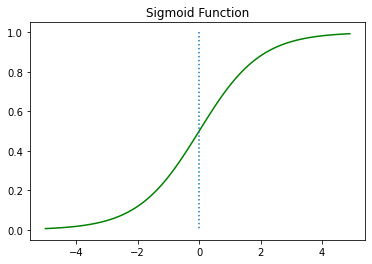

In [2]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [5]:
# 로지스틱 회귀 구현하기
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
    hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b))) # sigmoid
    losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
    cost = losses.mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [7]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)
print(W)
print(b)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


## 02. `nn.Module`로 구현하는 로지스틱 회귀
#### `nn.Linear`, `nn.Sigmoid`
#### `nn.Sequential`은 nn.Module 층을 차례로 쌓을 수 있도록 합니다. 이를 이용해 인공 신경망을 구현합니다. 쉽게 말해 여러 함수들을 연결해주는 역할입니다.

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [10]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = nn.Sequential( 
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( 
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.614994 Accuracy 66.67%
Epoch   10/1000 Cost: 0.747550 Accuracy 83.33%
Epoch   20/1000 Cost: 0.633216 Accuracy 83.33%
Epoch   30/1000 Cost: 0.538123 Accuracy 83.33%
Epoch   40/1000 Cost: 0.450406 Accuracy 83.33%
Epoch   50/1000 Cost: 0.366382 Accuracy 83.33%
Epoch   60/1000 Cost: 0.287368 Accuracy 83.33%
Epoch   70/1000 Cost: 0.219289 Accuracy 83.33%
Epoch   80/1000 Cost: 0.173225 Accuracy 100.00%
Epoch   90/1000 Cost: 0.151674 Accuracy 100.00%
Epoch  100/1000 Cost: 0.140280 Accuracy 100.00%
Epoch  110/1000 Cost: 0.131002 Accuracy 100.00%
Epoch  120/1000 Cost: 0.122903 Accuracy 100.00%
Epoch  130/1000 Cost: 0.115765 Accuracy 100.00%
Epoch  140/1000 Cost: 0.109426 Accuracy 100.00%
Epoch  150/1000 Cost: 0.103760 Accuracy 100.00%
Epoch  160/1000 Cost: 0.098664 Accuracy 100.00%
Epoch  170/1000 Cost: 0.094056 Accuracy 100.00%
Epoch  180/1000 Cost: 0.089870 Accuracy 100.00%
Epoch  190/1000 Cost: 0.086050 Accuracy 100.00%
Epoch  200/1000 Cost: 0.082549 Accuracy 100.00%


## 03. 클래스로 로지스틱 회귀 구현하기

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [13]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

model = BinaryClassifier()

optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    hypothesis = model(x_train)

    cost = F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) 
        correct_prediction = prediction.float() == y_train 
        accuracy = correct_prediction.sum().item() / len(correct_prediction) 
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( 
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.614994 Accuracy 66.67%
Epoch  100/1000 Cost: 0.140280 Accuracy 100.00%
Epoch  200/1000 Cost: 0.082549 Accuracy 100.00%
Epoch  300/1000 Cost: 0.058858 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045878 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037649 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031951 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027766 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024558 Accuracy 100.00%
Epoch  900/1000 Cost: 0.022020 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019960 Accuracy 100.00%


# ------------ 5. 소프트맥스 회귀 ------------- 